In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
from time import time 
import nltk
import gensim
from gensim.models import Word2Vec
import multiprocessing
import os
import sys
import seaborn as sns
import researchpy

In [2]:
#read in files, preprocessing
results1 = pd.read_excel('/Users/symphony/Desktop/Results1.xlsx')
results2 = pd.read_excel('/Users/symphony/Desktop/Results2.xlsx')
df = pd.concat([results1, results2], ignore_index=True)

In [3]:
df = df.drop(['CompletionDate','Amazon voucher winner', '11. Name', '12. SID',
              '2.a. If you selected Other, please specify:' ,
              '5.a. If you selected Other, please specify:'], axis = 1)

In [4]:
df.tail()

,1. Campus,2. How did you find out about the Welcome Buddy scheme? (tick all that apply),3. When did your Welcome Buddy first contact you?,4. Please select the most common way that you used to access your Ask ARU chat space with your Welcome Buddy.,5. Did you meet up with your Welcome Buddy (in person or online) in your first few weeks at ARU?,6. In what ways did your Welcome Buddy help you to settle in to life as a student at ARU?,sentiment,"7. One of the reasons for running the buddy scheme through Ask ARU, was so that you could meet other new students as well as your Welcome Buddy. How helpful did you find this?",8. Are you friends with any of the new students that are in the same group chat as you?,9. Are there any ways that we could improve the Welcome Buddy scheme?,10. Are there any other comments you would like to make about the Welcome Buddy scheme?
125,Cambridge,Email from the Welcome Buddy team,Before I arrived,Links in the auto emails,No - we couldn't figure out a convenient time ...,"When I was in my first year, i had a lot of an...",1,I don't feel strongly either way,No - none of them,Encourage fellow students to communicate in th...,No
126,Cambridge,"Email from the Welcome Buddy team,Email notifi...",Before I arrived,Going directly to the Ask ARU website in a web...,No - I didn't feel I needed this support,"Assisted me in helping find accomadation, prov...",1,I loved that I could chat to other new students,Yes - a few of them,"improve accessing the chat,rather than going t...",NaN
127,Chelmsford,Email from the Welcome Buddy team,Before I arrived,Links in the auto emails,No - I didn't feel I needed this support,Was great,1,I would rather have been able to talk to my bu...,No - none of them,An app,No
128,Chelmsford,Email when I accepted my place at ARU,Before I arrived,Links in the auto emails,No - I didn't feel I needed this support,Helped me by answering questions and concerns ...,1,I loved that I could chat to other new students,No - none of them,Face to face opportunities on campus,No
129,Cambridge,Email when I accepted my place at ARU,Before I arrived,Links in the auto emails,Yes - we met up in an online video call,"Meet in University, speak about their experien...",1,I loved that I could chat to other new students,No - none of them,"Yes, could make the page easier to access.",no


In [5]:
df = df.rename(columns={df.columns[0]:'campus', 
                        df.columns[1]:'how_became_aware', 
                        df.columns[2]:'first_contact', 
                        df.columns[3]:'access_method', 
                        df.columns[4]:'met_up', 
                        df.columns[5]:'how_helped', 
                        df.columns[7]:'meet_new', 
                        df.columns[8]:'friends', 
                        df.columns[9]:'suggestions', 
                        df.columns[10]:'comments'})
#df = df.drop(['if_other'], axis = 1)
df.head()

,campus,how_became_aware,first_contact,access_method,met_up,how_helped,sentiment,meet_new,friends,suggestions,comments
0,Chelmsford,"Email from the Welcome Buddy team,Email notifi...",Once teaching had started,Links in the auto emails,No - the Welcome Buddy didn't offer,It helps a lot to settle in to life as a stude...,1,I loved that I could chat to other new students,No - none of them,Help students and make events related to this,Often chat with students
1,Cambridge,"Email when I accepted my place at ARU,ARU Webp...",During Welcome Week,Links in the auto emails,Other,Provided information about the uniforms and ma...,1,I would rather have been able to talk to my bu...,No - none of them,Some students didn’t know about the welcome bu...,"It is a very lovely idea, even tho we did not ..."
2,Cambridge,Email when I accepted my place at ARU,Before I arrived,Links in the auto emails,No - I didn't feel I needed this support,To find notes,1,I loved that I could chat to other new students,No - none of them,Nothing,No
3,Peterborough,Email from the Welcome Buddy team,Before I arrived,Links in the auto emails,Other,There wasn’t too much information provided.,0,I would rather have been able to talk to my bu...,Yes - a few of them,Better/frequent communication? Never met my we...,Welcome buddy was understanding and enthusiast...
4,Chelmsford,Email from the Welcome Buddy team,During Welcome Week,Links in the auto emails,No - the Welcome Buddy didn't offer,They didn't to be honest.,0,I don't feel strongly either way,No - none of them,Put people together that are actually in the s...,It is a good idea in theory but it just didn't...


In [6]:
#remove and then check for unwanted cell
df = df[df["campus"].str.contains("Download from") == False]
if df['campus'].str.contains('Download from Online Surveys: up to 12/12/21, NS').any():
    print ("is there")
else:
    print ("gone")

gone


#### Students per campus

In [7]:
#find number of students in survey from each campus 
df['campus'].value_counts()
pd.DataFrame(data=df['campus'].value_counts(), dtype=None, copy=None)
#any observations from Peterborough will be underpowered 

,campus
Cambridge,58
Chelmsford,54
Peterborough,15


Text(0, 0.5, 'number of students')

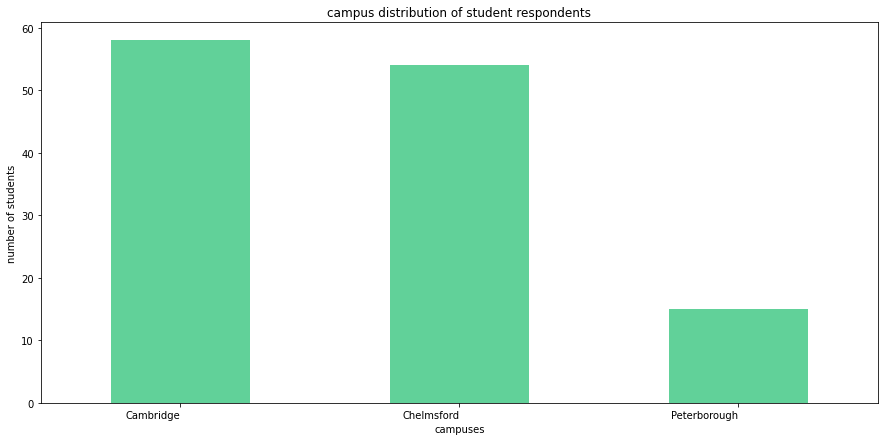

In [8]:
#visualize distribution of studnet respondents across three campuses 
df['campus'].value_counts().plot(kind="bar", figsize=(15,7), color="#61d199")
plt.title('campus distribution of student respondents')
plt.xlabel('campuses')
plt.xticks(rotation=0, ha='right')
plt.ylabel('number of students')

### meet_new

In [9]:
#find percentage of students in each campus who felt WB helped them meet new students
table = pd.crosstab(index=df['campus'], columns=df['meet_new'], normalize='index') *100
table

meet_new,I don't feel strongly either way,I loved that I could chat to other new students,I would rather have been able to talk to my buddy one to one only
campus,,,
Cambridge,46.551724,41.379310,12.068966
Chelmsford,38.888889,40.740741,20.370370
Peterborough,46.666667,33.333333,20.000000


In [10]:
#find percentage of students across campuses who felt WB helped them meet new students
total_meet_new = df['meet_new'].value_counts()
print(total_meet_new)
pd.DataFrame(data=total_meet_new, dtype=None, copy=None)
#most students reported "I don't feel strongly either way"

I don't feel strongly either way                                     55
I loved that I could chat to other new students                      51
I would rather have been able to talk to my buddy one to one only    21
Name: meet_new, dtype: int64


,meet_new
I don't feel strongly either way,55
I loved that I could chat to other new students,51
I would rather have been able to talk to my buddy one to one only,21


Text(0.5, 0, 'campus')

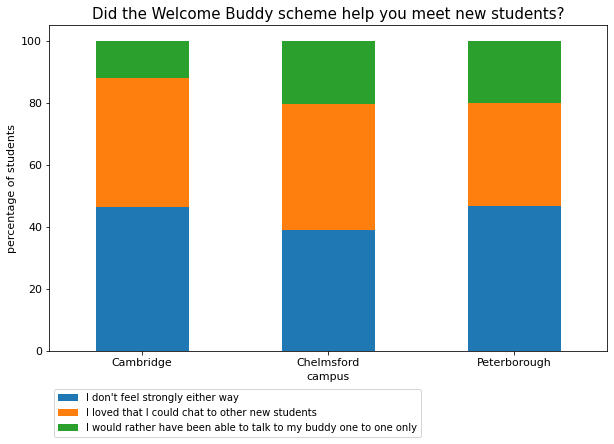

In [11]:
#stacked bar plot showing percentage of students in each campus who felt WB helped them meet new students
ax = table.plot(kind='bar', stacked=True, figsize=(10,6), rot=0)
plt.title('Did the Welcome Buddy scheme help you meet new students?', fontsize=15)
ax.legend(title='', bbox_to_anchor=(0, -.1), loc='upper left', prop={'size': 10})
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)
plt.ylabel('percentage of students', fontsize = 11)
plt.xlabel('campus', fontsize = 11)

In [12]:
#encode meet_new to run correlation
# scale i created to avoid .corr mininterpreting encoding
#3 = I loved that I could chat to other new students'; 2 = I would rather have been able to talk...; 1 = I dont feel..
#I am treating, even though this is a poorly worded question that "I would rather have been able to 
#talk to my buddy one to one only" indicates that WB didn't help them meet new friends

cleanup_meet_new = {"meet_new":     {"I loved that I could chat to other new students": 3, 
                                     "I don't feel strongly either way": 2, 
                                     "I would rather have been able to talk to my buddy one to one only" : 1 }}
df = df.replace(cleanup_meet_new)
df.head()

#encode campus (w/o loosing campus column) to run correlation

df["Cambridge"] = df['campus'].str.contains('Cam') *1
df["Chelmsford"] = df['campus'].str.contains('Chel') *1
df["Peterborough"] = df['campus'].str.contains('Peter') *1

df.head()


,campus,how_became_aware,first_contact,access_method,met_up,how_helped,sentiment,meet_new,friends,suggestions,comments,Cambridge,Chelmsford,Peterborough
0,Chelmsford,"Email from the Welcome Buddy team,Email notifi...",Once teaching had started,Links in the auto emails,No - the Welcome Buddy didn't offer,It helps a lot to settle in to life as a stude...,1,3,No - none of them,Help students and make events related to this,Often chat with students,0,1,0
1,Cambridge,"Email when I accepted my place at ARU,ARU Webp...",During Welcome Week,Links in the auto emails,Other,Provided information about the uniforms and ma...,1,1,No - none of them,Some students didn’t know about the welcome bu...,"It is a very lovely idea, even tho we did not ...",1,0,0
2,Cambridge,Email when I accepted my place at ARU,Before I arrived,Links in the auto emails,No - I didn't feel I needed this support,To find notes,1,3,No - none of them,Nothing,No,1,0,0
3,Peterborough,Email from the Welcome Buddy team,Before I arrived,Links in the auto emails,Other,There wasn’t too much information provided.,0,1,Yes - a few of them,Better/frequent communication? Never met my we...,Welcome buddy was understanding and enthusiast...,0,0,1
4,Chelmsford,Email from the Welcome Buddy team,During Welcome Week,Links in the auto emails,No - the Welcome Buddy didn't offer,They didn't to be honest.,0,2,No - none of them,Put people together that are actually in the s...,It is a good idea in theory but it just didn't...,0,1,0


In [13]:
#did campus significantly effect how students responded to this question

new_df = df[['Cambridge', 'Chelmsford', 'Peterborough', 'meet_new']].copy()

corr_tab = new_df.corr()["meet_new"]
print(corr_tab)

print('Correlation between Cambridge and meet_new')
cam_corr = new_df['Cambridge'].corr(new_df['meet_new'])
print(cam_corr)


Cambridge       0.072947
Chelmsford     -0.039118
Peterborough   -0.052666
meet_new        1.000000
Name: meet_new, dtype: float64
Correlation between Cambridge and meet_new
0.07294684099480034


In [14]:
#crosstab of meet_new w/ percentages
meet_new_t = researchpy.crosstab(df['campus'], df['meet_new'], prop = "row")
meet_new_t

meet_new                     
meet_new            1      2      3    All
campus                                    
Cambridge       12.07  46.55  41.38  100.0
Chelmsford      20.37  38.89  40.74  100.0
Peterborough    20.00  46.67  33.33  100.0
All             16.54  43.31  40.16  100.0

In [15]:
meet_new_t, meet_new_res = researchpy.crosstab(df['campus'], df['meet_new'], test= "chi-square")
meet_new_res
#no relationship between variables, accept null

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,1.9125
1,p-value =,0.7519
2,Cramer's V =,0.0868


### first contact

In [16]:
#find when first_contact
total_first_contact = df['first_contact'].value_counts()
print(total_first_contact)
#most students reported they were contacted during welcome week

During Welcome Week                60
Before I arrived                   44
Once teaching had started          16
They still haven't contacted me     7
Name: first_contact, dtype: int64


Text(0, 0.5, 'frequency')

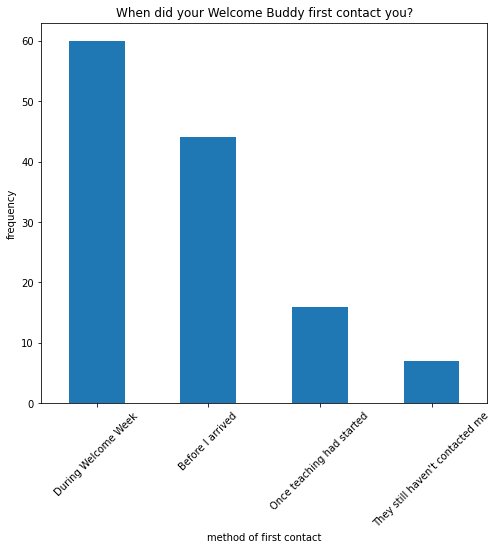

In [17]:
ax = total_first_contact.plot(kind='bar', figsize=(8,7),rot=45)
plt.title('When did your Welcome Buddy first contact you?')
plt.xlabel('method of first contact')
plt.ylabel('frequency')

In [18]:
#find first_contact broken down by campus
table1 = pd.crosstab(index=df['campus'], columns=df['first_contact'], normalize='index') *100
print(table1)
#even subsetted by campus, most students reported they were contacted during welcome week


first_contact  Before I arrived  During Welcome Week  \
campus                                                 
Cambridge             29.310345            51.724138   
Chelmsford            38.888889            42.592593   
Peterborough          40.000000            46.666667   

first_contact  Once teaching had started  They still haven't contacted me  
campus                                                                     
Cambridge                      12.068966                         6.896552  
Chelmsford                     14.814815                         3.703704  
Peterborough                    6.666667                         6.666667  


In [19]:
#percentage
first_contact_t = researchpy.crosstab(df['campus'], df['first_contact'], prop = "row")
first_contact_t


first_contact                                                \
first_contact Before I arrived During Welcome Week Once teaching had started   
campus                                                                         
Cambridge                29.31               51.72                     12.07   
Chelmsford               38.89               42.59                     14.81   
Peterborough             40.00               46.67                      6.67   
All                      34.65               47.24                     12.60   

                                                      
first_contact They still haven't contacted me    All  
campus                                                
Cambridge                                6.90  100.0  
Chelmsford                               3.70  100.0  
Peterborough                             6.67  100.0  
All                                      5.51  100.0

In [20]:
first_contact_t, first_contact_res = researchpy.crosstab(df['campus'], df['first_contact'], test= "chi-square")
first_contact_res

#accept null, no relationship

,Chi-square test,results
0,Pearson Chi-square ( 6.0) =,2.5768
1,p-value =,0.8598
2,Cramer's V =,0.1007


Text(0, 0.5, 'percentage of responses')

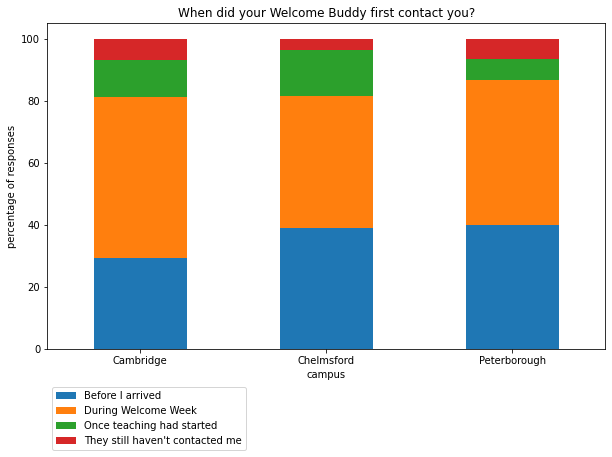

In [21]:
#visualization of method of first contact by WB, subsetted by campus
ax = table1.plot(kind='bar', stacked=True, figsize=(10,6), rot=0)
plt.title('When did your Welcome Buddy first contact you?')
ax.legend(title='', bbox_to_anchor=(0, -.1), loc='upper left')
plt.ylabel('percentage of responses')

### how became aware

In [22]:
#check all unique values in how_became_aware column
print(df['how_became_aware'].unique())

['Email from the Welcome Buddy team,Email notification from my Welcome Buddy'
 'Email when I accepted my place at ARU,ARU Webpages,Email from the Welcome Buddy team,Email notification from my Welcome Buddy'
 'Email when I accepted my place at ARU'
 'Email from the Welcome Buddy team'
 'Email notification from my Welcome Buddy'
 'Email when I accepted my place at ARU,Email from the Welcome Buddy team'
 "I didn't receive any information"
 'Email when I accepted my place at ARU,Email from the Welcome Buddy team,Email notification from my Welcome Buddy'
 'Open Day,Email from the Welcome Buddy team' 'Open Day'
 'Open Day,Email notification from my Welcome Buddy'
 'Email when I accepted my place at ARU,ARU Facebook group,Email from the Welcome Buddy team,Email notification from my Welcome Buddy'
 'Email when I accepted my place at ARU,ARU Webpages,Email from the Welcome Buddy team'
 'Email when I accepted my place at ARU,ARU Facebook group,Email from the Welcome Buddy team'
 'Email from the 

In [23]:
#encode all responses from how_became_aware column
df["email__when_accepted"] = df['how_became_aware'].str.contains('Email when I accepted my place at ARU') *1
df["email_from_wb"] = df['how_became_aware'].str.contains('Email notification from my Welcome Buddy') *1
df["from_wbt"] = df['how_became_aware'].str.contains('Email from the Welcome Buddy team') *1
df["open_day"] = df['how_became_aware'].str.contains('Open Day') *1
df["fb"] = df['how_became_aware'].str.contains('ARU Facebook group')*1
df["no_info"] = df['how_became_aware'].str.contains('receive any information')*1
df["web"] = df['how_became_aware'].str.contains('Webpages')*1
df["other"] = df['how_became_aware'].str.contains('Other')*1

df = df.drop(['how_became_aware'], axis = 1)
df.head()

,campus,first_contact,access_method,met_up,how_helped,sentiment,meet_new,friends,suggestions,comments,...,Chelmsford,Peterborough,email__when_accepted,email_from_wb,from_wbt,open_day,fb,no_info,web,other
0,Chelmsford,Once teaching had started,Links in the auto emails,No - the Welcome Buddy didn't offer,It helps a lot to settle in to life as a stude...,1,3,No - none of them,Help students and make events related to this,Often chat with students,...,1,0,0,1,1,0,0,0,0,0
1,Cambridge,During Welcome Week,Links in the auto emails,Other,Provided information about the uniforms and ma...,1,1,No - none of them,Some students didn’t know about the welcome bu...,"It is a very lovely idea, even tho we did not ...",...,0,0,1,1,1,0,0,0,1,0
2,Cambridge,Before I arrived,Links in the auto emails,No - I didn't feel I needed this support,To find notes,1,3,No - none of them,Nothing,No,...,0,0,1,0,0,0,0,0,0,0
3,Peterborough,Before I arrived,Links in the auto emails,Other,There wasn’t too much information provided.,0,1,Yes - a few of them,Better/frequent communication? Never met my we...,Welcome buddy was understanding and enthusiast...,...,0,1,0,0,1,0,0,0,0,0
4,Chelmsford,During Welcome Week,Links in the auto emails,No - the Welcome Buddy didn't offer,They didn't to be honest.,0,2,No - none of them,Put people together that are actually in the s...,It is a good idea in theory but it just didn't...,...,1,0,0,0,1,0,0,0,0,0


In [24]:
#proportion of students from each campus who became aware from: email when accepted
email_when_accepted = pd.crosstab(index=df['campus'], columns=df['email__when_accepted'], normalize='index')
email_when_accepted
#58.62% of students from Cambridge became aware from email when accepted; 
#42.59% of students from Chelmsford became aware from email when accepted; 
#20% of students from Peterborough became aware from email when accepted

email__when_accepted,0,1
campus,,
Cambridge,0.413793,0.586207
Chelmsford,0.574074,0.425926
Peterborough,0.800000,0.200000


Text(0, 0.5, 'proportion of students')

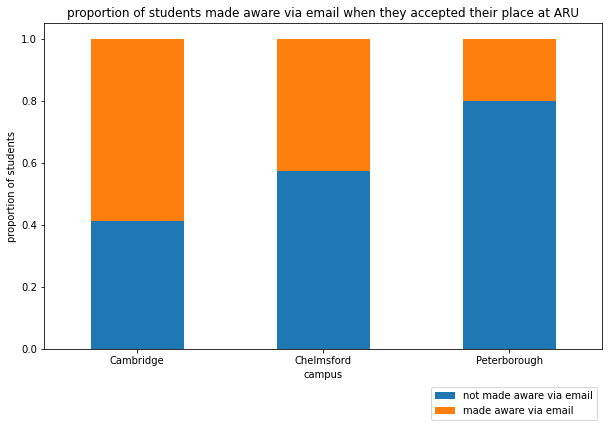

In [25]:
#visualization of proportion of students from each campus who became aware from email when accepted
ax = pd.crosstab(index=df['campus'], columns=df['email__when_accepted'], normalize='index').plot(kind='bar', 
stacked=True, figsize=(10,6), rot=0)
plt.title('proportion of students made aware via email when they accepted their place at ARU')
plt.legend(["not made aware via email", "made aware via email"], bbox_to_anchor=(1, -.1), loc ="upper right")
plt.ylabel('proportion of students')

In [26]:
#proportion of students from each campus who became aware from: email from wb
email_from_wb = pd.crosstab(index=df['campus'], columns=df['email_from_wb'], normalize='index')
email_from_wb
#27.59% of students from Cambridge became aware from email when accepted; 
#40.74% of students from Chelmsford became aware from email when accepted; 
#40% of students from Peterborough became aware from email when accepted

email_from_wb,0,1
campus,,
Cambridge,0.724138,0.275862
Chelmsford,0.592593,0.407407
Peterborough,0.600000,0.400000


Text(0, 0.5, 'proportion of students')

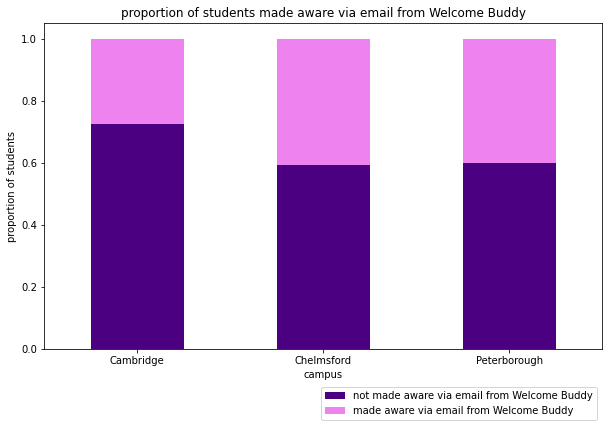

In [27]:
#visualization of proportion of students from each campus who became aware from email from wb
ax = pd.crosstab(index=df['campus'], columns=df['email_from_wb'], normalize='index').plot(kind='bar', 
stacked=True, figsize=(10,6), rot=0, color = ['indigo', 'violet'])
plt.title('proportion of students made aware via email from Welcome Buddy')
plt.legend(["not made aware via email from Welcome Buddy", "made aware via email from Welcome Buddy"], 
           bbox_to_anchor=(1, -.1), loc ="upper right")
plt.ylabel('proportion of students')

Text(0, 0.5, 'proportion of students')

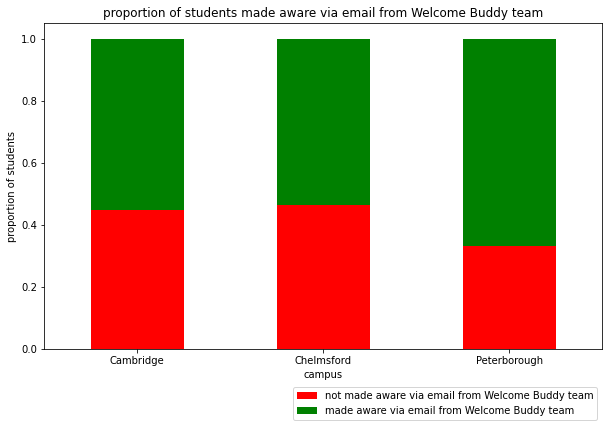

In [28]:
#visualization of proportion of students from each campus who became aware from email from wbt
ax = pd.crosstab(index=df['campus'], columns=df['from_wbt'], normalize='index').plot(kind='bar', 
stacked=True, figsize=(10,6), rot=0, color = ['red', 'green'])
plt.title('proportion of students made aware via email from Welcome Buddy team')
plt.legend(["not made aware via email from Welcome Buddy team", "made aware via email from Welcome Buddy team"], 
           bbox_to_anchor=(1, -.1), loc ="upper right")
plt.ylabel('proportion of students')

In [29]:
#proportion of students from each campus who became aware from: email from open day
open_day = pd.crosstab(index=df['campus'], columns=df['open_day'], normalize='index')
open_day
#8.62% of students from Cambridge became aware from open day; 
#9.26% of students from Chelmsford became aware from open day; 
#26.67% of students from Peterborough became aware from open day

open_day,0,1
campus,,
Cambridge,0.913793,0.086207
Chelmsford,0.907407,0.092593
Peterborough,0.733333,0.266667


Text(0, 0.5, 'proportion of students')

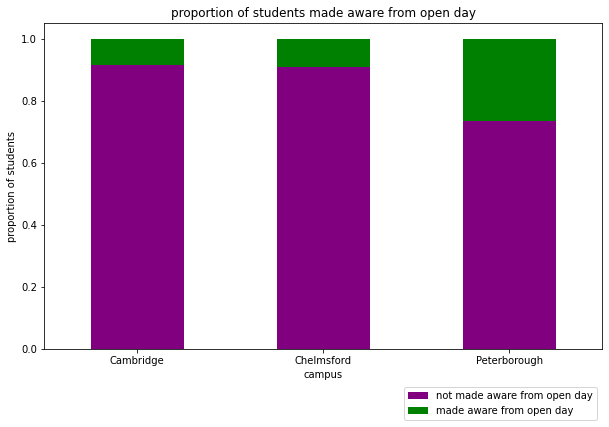

In [30]:
#visualization of proportion of students from each campus who became aware from: email from open day
ax = pd.crosstab(index=df['campus'], columns=df['open_day'], normalize='index').plot(kind='bar', 
stacked=True, figsize=(10,6), rot=0, color = ['purple', 'green'])
plt.title('proportion of students made aware from open day')
plt.legend(["not made aware from open day", "made aware from open day"], 
           bbox_to_anchor=(1, -.1), loc ="upper right")
plt.ylabel('proportion of students')

In [31]:
#proportion of students from each campus who became aware from: ARU Facebook group
fb = pd.crosstab(index=df['campus'], columns=df['fb'], normalize='index')
fb
#6.90% of students from Cambridge became aware from ARU Facebook group; 
#1.85% of students from Chelmsford became aware from ARU Facebook group; 
#0% of students from Peterborough became aware from ARU Facebook group

fb,0,1
campus,,
Cambridge,0.931034,0.068966
Chelmsford,0.981481,0.018519
Peterborough,1.000000,0.000000


Text(0, 0.5, 'proportion of students')

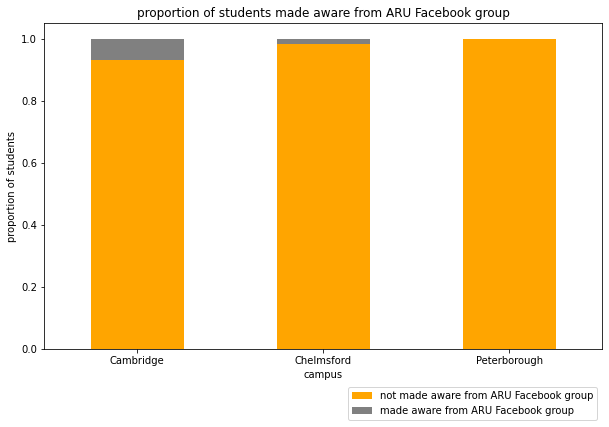

In [32]:
#visualization of proportion of students from each campus who became aware from: ARU Facebook group
ax = pd.crosstab(index=df['campus'], columns=df['fb'], normalize='index').plot(kind='bar', 
stacked=True, figsize=(10,6), rot=0, color = ['orange', 'gray'])
plt.title('proportion of students made aware from ARU Facebook group')
plt.legend(["not made aware from ARU Facebook group", "made aware from ARU Facebook group"], 
           bbox_to_anchor=(1, -.1), loc ="upper right")
plt.ylabel('proportion of students')

In [33]:
#proportion of students from each campus who became aware from: didn't receive any information
no_info = pd.crosstab(index=df['campus'], columns=df['no_info'], normalize='index')
no_info
#3.45% of students from Cambridge didn't receive any information; 
#1.85% of students from Chelmsford didn't receive any information; 
#0% of students from Peterborough didn't receive any information

no_info,0,1
campus,,
Cambridge,0.965517,0.034483
Chelmsford,0.981481,0.018519
Peterborough,1.000000,0.000000


Text(0, 0.5, 'proportion of students')

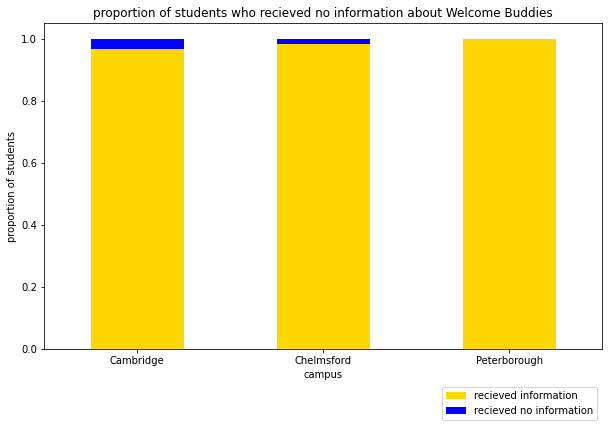

In [34]:
#visualization of proportion of students from each campus who didn't receive any information
ax = pd.crosstab(index=df['campus'], columns=df['no_info'], normalize='index').plot(kind='bar', 
stacked=True, figsize=(10,6), rot=0, color= ['gold', 'blue'])
plt.title('proportion of students who recieved no information about Welcome Buddies')
plt.legend(["recieved information", "recieved no information"], 
           bbox_to_anchor=(1, -.1), loc ="upper right")
plt.ylabel('proportion of students')


In [35]:
#proportion of students from each campus who became aware from: ARU Webpages
web = pd.crosstab(index=df['campus'], columns=df['web'], normalize='index')
web
#12.07% of students from Cambridge who became aware from: ARU Webpages; 
#7.41% of students from Chelmsford who became aware from: ARU Webpages; 
#0% of students from Peterborough who became aware from: ARU Webpages

web,0,1
campus,,
Cambridge,0.879310,0.120690
Chelmsford,0.925926,0.074074
Peterborough,1.000000,0.000000


Text(0, 0.5, 'proportion of students')

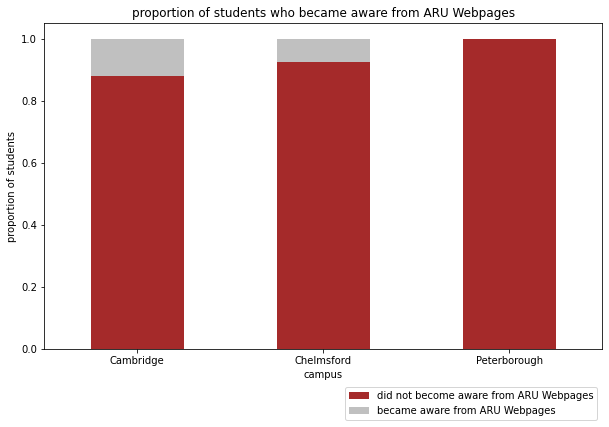

In [36]:
#visualization of proportion of students from each campus who became aware from: ARU Webpages
ax = pd.crosstab(index=df['campus'], columns=df['web'], normalize='index').plot(kind='bar', 
stacked=True, figsize=(10,6), rot=0, color = ['brown','silver'])
plt.title('proportion of students who became aware from ARU Webpages')
plt.legend(["did not become aware from ARU Webpages", "became aware from ARU Webpages"], 
           bbox_to_anchor=(1, -.1), loc ="upper right")
plt.ylabel('proportion of students')

In [37]:
#proportion of students from each campus who became aware from: other means
other = pd.crosstab(index=df['campus'], columns=df['other'], normalize='index')
other
#3.45% of students from Cambridge who became aware from: other means; 
#0% of students from Chelmsford who became aware from: other means; 
#0% of students from Peterborough who became aware from: other means

other,0,1
campus,,
Cambridge,0.965517,0.034483
Chelmsford,1.000000,0.000000
Peterborough,1.000000,0.000000


Text(0, 0.5, 'proportion of students')

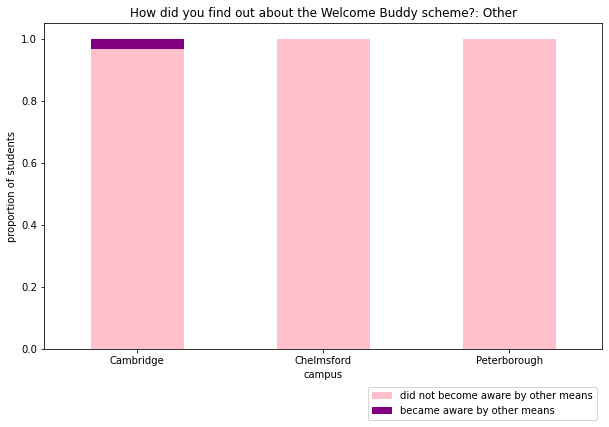

In [38]:
#visualization of proportion of students from each campus who became aware from: other means
ax = pd.crosstab(index=df['campus'], columns=df['other'], normalize='index').plot(kind='bar', 
stacked=True, figsize=(10,6), rot=0, color = ['pink', 'purple'])
plt.title('How did you find out about the Welcome Buddy scheme?: Other')
plt.legend(["did not become aware by other means", "became aware by other means"], 
           bbox_to_anchor=(1, -.1), loc ="upper right")
plt.ylabel('proportion of students')

## met_up

In [39]:
#did you meet up with your Welcome Buddy (in person or online) in your first few weeks at ARU?
mu = pd.crosstab(index=df['campus'], columns=df['met_up'], normalize='index') *100
mu

met_up,No - I didn't feel I needed this support,No - the Welcome Buddy didn't offer,No - we couldn't figure out a convenient time for us to meet,Other,Yes - we met up in an online video call,Yes - we met up in person
campus,,,,,,
Cambridge,37.931034,22.413793,12.068966,5.172414,1.724138,20.689655
Chelmsford,37.037037,27.777778,11.111111,1.851852,11.111111,11.111111
Peterborough,26.666667,33.333333,20.000000,13.333333,0.000000,6.666667


In [40]:
#total first meet up
total_met_up = df['met_up'].value_counts()
print(total_met_up)
#most students reported they were contacted during welcome week

No - I didn't feel I needed this support                        46
No - the Welcome Buddy didn't offer                             33
Yes - we met up in person                                       19
No - we couldn't figure out a convenient time for us to meet    16
Yes - we met up in an online video call                          7
Other                                                            6
Name: met_up, dtype: int64


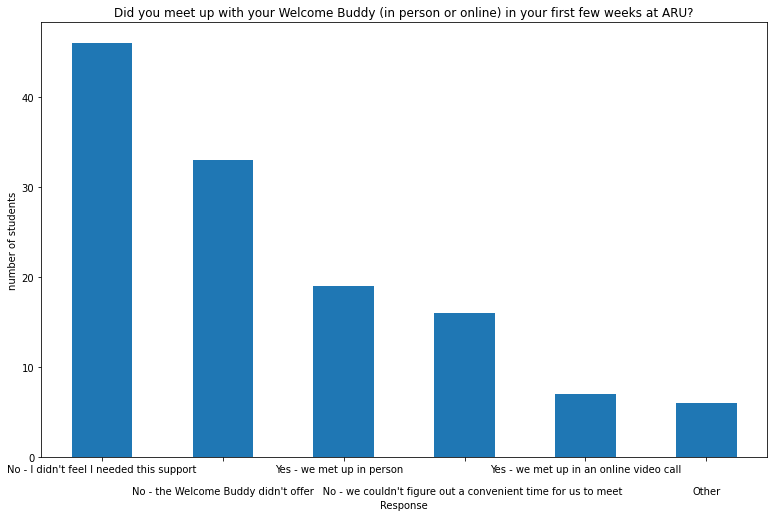

In [41]:
#visualization of:total_met_up
ax = total_met_up.plot(kind='bar', figsize=(13,8),rot=0)
plt.title('Did you meet up with your Welcome Buddy (in person or online) in your first few weeks at ARU?')
plt.xlabel('Response')
plt.ylabel('number of students')

ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(["No - I didn't feel I needed this support","No - the Welcome Buddy didn't offer",
                    "Yes - we met up in person   ","     No - we couldn't figure out a convenient time for us to meet",
                    "Yes - we met up in an online video call", "Other"])

#[1::2] means start from the second element in the list and get every other element
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(25)

plt.show()

Text(0, 0.5, 'proportion of students')

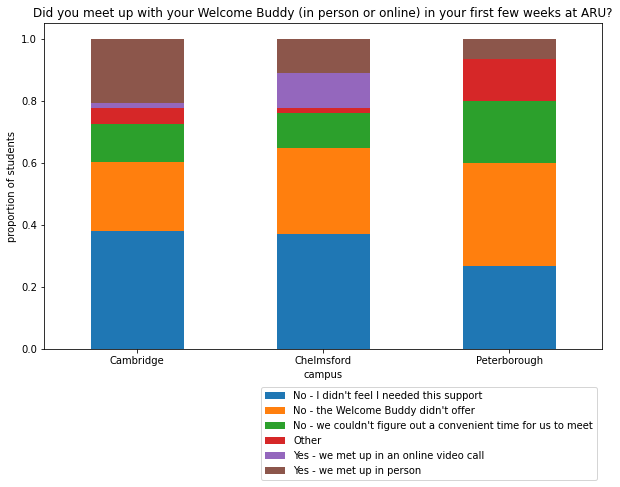

In [42]:
#visualization of proportion of:
#did you meet up with your Welcome Buddy (in person or online) in your first few weeks at ARU?
ax = pd.crosstab(index=df['campus'], columns=df['met_up'], normalize='index').plot(kind='bar', 
stacked=True, figsize=(10,6), rot=0)
plt.title('Did you meet up with your Welcome Buddy (in person or online) in your first few weeks at ARU?')
plt.legend(["No - I didn't feel I needed this support", "No - the Welcome Buddy didn't offer", 
            "No - we couldn't figure out a convenient time for us to meet", "Other", 
            "Yes - we met up in an online video call", "Yes - we met up in person"], 
           bbox_to_anchor=(1, -.1), loc ="upper right")
plt.ylabel('proportion of students')

In [43]:
t, res = researchpy.crosstab(df['campus'], df['met_up'], test= "chi-square")
t
#this crosstab is the same as the crosstab for met_up just with counts, not proportions

met_up  \
met_up       No - I didn't feel I needed this support   
campus                                                  
Cambridge                                          22   
Chelmsford                                         20   
Peterborough                                        4   
All                                                46   

                                                  \
met_up       No - the Welcome Buddy didn't offer   
campus                                             
Cambridge                                     13   
Chelmsford                                    15   
Peterborough                                   5   
All                                           33   

                                                                           \
met_up       No - we couldn't figure out a convenient time for us to meet   
campus                                                                      
Cambridge                                                     7             
Chelmsford                                                    6             
Peterborough                                                  3             
All                                                          16             

                                                            \
met_up       Other Yes - we met up in an online video call   
campus                                                       
Cambridge        3                                       1   
Chelmsford       1                                       6   
Peterborough     2                                       0   
All              6                                       7   

                                             
met_up       Yes - we met up in person  All  
campus                                       
Cambridge                           12   58  
Chelmsford                           6   54  
Peterborough                         1   15  
All                                 19  127

In [44]:
tt = researchpy.crosstab(df['campus'], df['met_up'], prop= "row")
tt

met_up  \
met_up       No - I didn't feel I needed this support   
campus                                                  
Cambridge                                       37.93   
Chelmsford                                      37.04   
Peterborough                                    26.67   
All                                             36.22   

                                                  \
met_up       No - the Welcome Buddy didn't offer   
campus                                             
Cambridge                                  22.41   
Chelmsford                                 27.78   
Peterborough                               33.33   
All                                        25.98   

                                                                           \
met_up       No - we couldn't figure out a convenient time for us to meet   
campus                                                                      
Cambridge                                                 12.07             
Chelmsford                                                11.11             
Peterborough                                              20.00             
All                                                       12.60             

                                                             \
met_up        Other Yes - we met up in an online video call   
campus                                                        
Cambridge      5.17                                    1.72   
Chelmsford     1.85                                   11.11   
Peterborough  13.33                                    0.00   
All            4.72                                    5.51   

                                               
met_up       Yes - we met up in person    All  
campus                                         
Cambridge                        20.69  100.0  
Chelmsford                       11.11  100.0  
Peterborough                      6.67  100.0  
All                              14.96  100.0

In [45]:
res
#results indicates that the null hypothesis that the variables are independent cannot be rejected. The variables
#are independent, there is no relationship between the campus of a respondent and whether they met up

,Chi-square test,results
0,Pearson Chi-square ( 10.0) =,13.0839
1,p-value =,0.2190
2,Cramer's V =,0.2270


In [46]:
#group this column in binary column: yes or no
met_up_df = df[['Cambridge', 'Chelmsford', 'Peterborough', 'met_up']].copy()
#remove "other" from met_up column
met_up_df.drop(df[df['met_up'] == 'Other'].index, inplace = True)
#encode Yes and Nos as binary variable
met_up_df["met_up_encoded"] = np.where(met_up_df["met_up"].str.contains("Yes"), 1, 0)
#remove unencoded column
met_up_df = met_up_df.drop(columns=['met_up'])
met_up_df

,Cambridge,Chelmsford,Peterborough,met_up_encoded
0,0,1,0,0
2,1,0,0,0
4,0,1,0,0
5,0,1,0,0
6,0,0,1,0
...,...,...,...,...
125,1,0,0,0
126,1,0,0,0
127,0,1,0,0
128,0,1,0,0


In [47]:
#statistical test 
met_up_t, met_up_res = researchpy.crosstab(met_up_df['Cambridge'], met_up_df['met_up_encoded'], test= "chi-square")
print(met_up_res)
ch_met_up_t, ch_met_up_res = researchpy.crosstab(met_up_df['Chelmsford'], met_up_df['met_up_encoded'], test= "chi-square")
print(ch_met_up_res)
p_met_up_t, p_met_up_res = researchpy.crosstab(met_up_df['Peterborough'], met_up_df['met_up_encoded'], test= "chi-square")
print(p_met_up_res)
#none are significant

                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.2760
1                    p-value =    0.5994
2               Cramer's phi =    0.0478
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.0744
1                    p-value =    0.7850
2               Cramer's phi =    0.0248
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    1.6430
1                    p-value =    0.1999
2               Cramer's phi =    0.1165


### friends

In [48]:
#Are you friends with any of the new students that are in the same group chat as you?
pd.crosstab(index=df['campus'], columns=df['friends'], normalize='index')

friends,No - none of them,Yes - a few of them,Yes - all of them,Yes - just one of them
campus,,,,
Cambridge,0.603448,0.258621,0.034483,0.103448
Chelmsford,0.611111,0.259259,0.074074,0.055556
Peterborough,0.266667,0.333333,0.400000,0.000000


Text(0, 0.5, 'proportion of students')

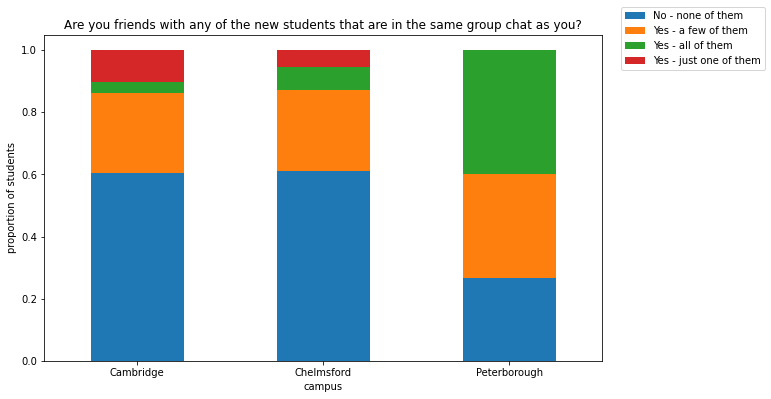

In [49]:
#visualization of proportion of:
#Are you friends with any of the new students that are in the same group chat as you?
ax = pd.crosstab(index=df['campus'], columns=df['friends'], normalize='index').plot(kind='bar', 
stacked=True, figsize=(10,6), rot=0)
plt.title('Are you friends with any of the new students that are in the same group chat as you?')
plt.legend(["No - none of them", "Yes - a few of them", 
            "Yes - all of them", "Yes - just one of them"], bbox_to_anchor=(1.3, 1.1), loc ="upper right")
plt.ylabel('proportion of students')

In [50]:
friends_t = researchpy.crosstab(df['campus'], df['friends'], prop= "row")
friends_t

friends                                        \
friends      No - none of them Yes - a few of them Yes - all of them   
campus                                                                 
Cambridge                60.34               25.86              3.45   
Chelmsford               61.11               25.93              7.41   
Peterborough             26.67               33.33             40.00   
All                      56.69               26.77              9.45   

                                            
friends      Yes - just one of them    All  
campus                                      
Cambridge                     10.34  100.0  
Chelmsford                     5.56  100.0  
Peterborough                   0.00  100.0  
All                            7.09  100.0

In [51]:
friends_t, friends_res = researchpy.crosstab(df['campus'], df['friends'], test= "chi-square")
friends_res
#the p-vaue indicates a rejection of the null and that campus is associated with whether students are friends 
#with any of the new students that are in the same group chat

,Chi-square test,results
0,Pearson Chi-square ( 6.0) =,22.3575
1,p-value =,0.0010
2,Cramer's V =,0.2967


In [52]:
friends_df = df[['Cambridge', 'Chelmsford', 'Peterborough', 'friends']].copy()
friends_df

,Cambridge,Chelmsford,Peterborough,friends
0,0,1,0,No - none of them
1,1,0,0,No - none of them
2,1,0,0,No - none of them
3,0,0,1,Yes - a few of them
4,0,1,0,No - none of them
...,...,...,...,...
125,1,0,0,No - none of them
126,1,0,0,Yes - a few of them
127,0,1,0,No - none of them
128,0,1,0,No - none of them


In [53]:
#since got significant p-value, need to assess correlation
#first encode friends
friends_df["friends_encoded"] = np.where(friends_df["friends"].str.contains("Yes"), 1, 0)
friends_df.drop(columns=['friends'])

,Cambridge,Chelmsford,Peterborough,friends_encoded
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,1
4,0,1,0,0
...,...,...,...,...
125,1,0,0,0
126,1,0,0,1
127,0,1,0,0
128,0,1,0,0


In [54]:
friends_corr_tab = friends_df.corr()['friends_encoded']
friends_corr_tab
#this indicates that chelmsford students are the least like to have friends...

Cambridge         -0.067572
Chelmsford        -0.076690
Peterborough       0.221765
friends_encoded    1.000000
Name: friends_encoded, dtype: float64

In [55]:
#Cambridge
friends_split_t, friends_split_res = researchpy.crosstab(friends_df["Cambridge"], friends_df['friends_encoded'], test= "chi-square")
friends_split_res
#Cambridge: not significant

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,0.5799
1,p-value =,0.4464
2,Cramer's phi =,0.0676


In [56]:
#Chelmsford
ch_friends_split_t, ch_friends_split_res = researchpy.crosstab(friends_df["Chelmsford"], friends_df['friends_encoded'], test= "chi-square")
ch_friends_split_res
#Chelmsford: notsignificant

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,0.7469
1,p-value =,0.3875
2,Cramer's phi =,0.0767


In [57]:
#Peterborough
p_friends_split_t, p_friends_split_res = researchpy.crosstab(friends_df["Peterborough"], friends_df['friends_encoded'], test= "chi-square")
p_friends_split_res
#Peterborough: significant! Peterb is anomoly for its size 

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,6.2458
1,p-value =,0.0124
2,Cramer's phi =,0.2218


In [58]:
######################################

In [59]:
len(df)

127